11.	Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into
categories.


In [4]:
# Import Libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [6]:

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

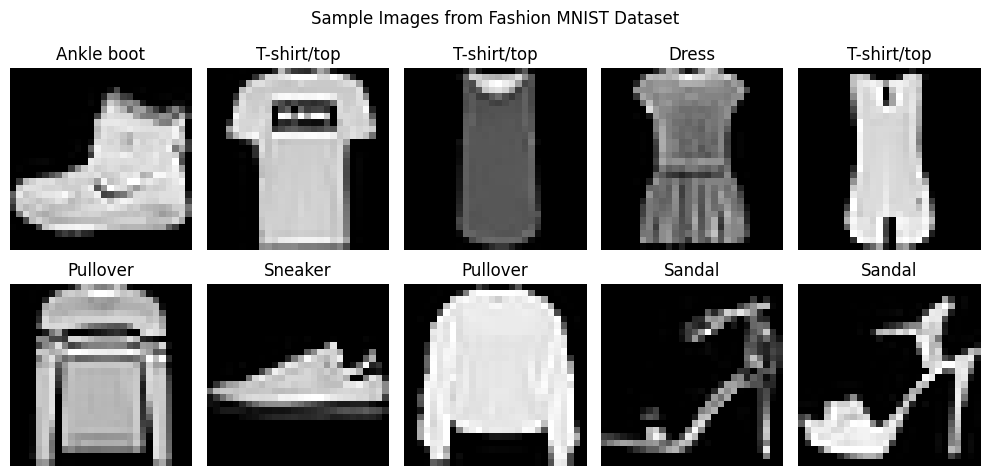

In [40]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,5))
for i in range(10):                      #show first 10 images
    plt.subplot(2, 5, i+1)               # 2 rows * 5 columns
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle('Sample Images from Fashion MNIST Dataset')
plt.tight_layout()
plt.show()


In [44]:
# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
# Batch Size = Number of images processed together in one step during training.
#-1 = Auto-detect total images (batch size)
# 1 _ number of channels ,,1 because it's a grayscale image (single color channel).
#If it were a color image (RGB), this would be 3.

In [9]:
# Define the Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])


C:\Users\samik\anaconda3\envs\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
'''optimizer='adam': Controls how weights update.

loss=...: Measures how wrong the predictions are.

metrics=['accuracy']: Monitors performance during training and testing.'''

In [11]:
# Train the Model
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 13ms/step - accuracy: 0.7571 - loss: 0.6765 - val_accuracy: 0.8657 - val_loss: 0.3582
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.8768 - loss: 0.3357 - val_accuracy: 0.8899 - val_loss: 0.2956
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.8946 - loss: 0.2848 - val_accuracy: 0.9013 - val_loss: 0.2708
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9065 - loss: 0.2533 - val_accuracy: 0.8936 - val_loss: 0.2793
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9158 - loss: 0.2250 - val_accuracy: 0.9073 - val_loss: 0.2580
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9232 - loss: 0.2053 - val_accuracy: 0.9075 - val_loss: 0.2528
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9307 - loss: 0.1889 - val_accuracy: 0.9097 - val_loss: 0.2575
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9355 -

In [12]:
# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9178 - loss: 0.2641
Test Accuracy: 0.92


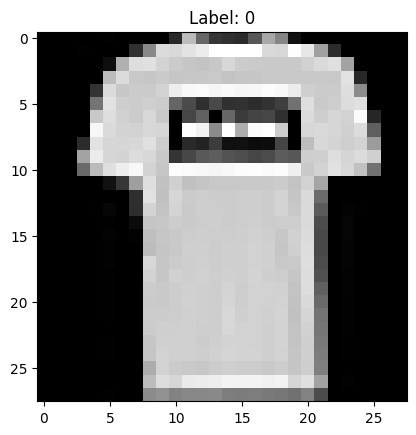

In [52]:
# Plot sample image and label
plt.imshow(x_train[1].reshape(28,28), cmap='gray')
plt.title(f"Label: {y_train[1]}")
plt.show()

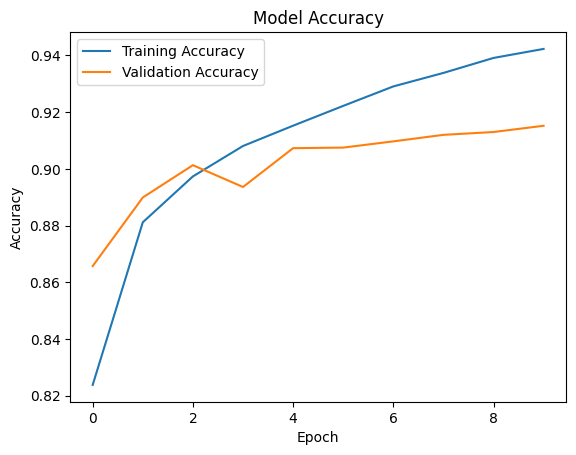

In [14]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


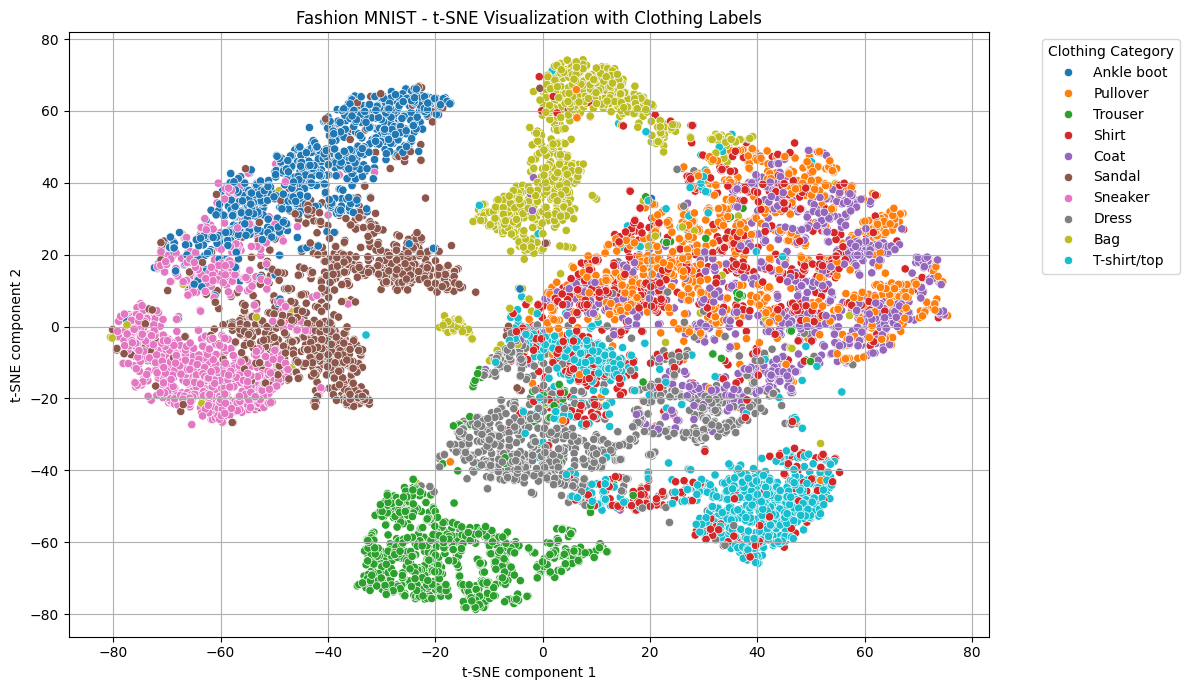

In [15]:


from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Label mapping
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Flatten x_test from (10000, 28, 28, 1) to (10000, 784)
x_test_flat = x_test.reshape(-1, 28*28)

# Perform t-SNE
x_test_2d = TSNE(n_components=2, random_state=42).fit_transform(x_test_flat)

# Map y_test to class names
y_test_labels = [class_names[label] for label in y_test]

# Plot using true label names
plt.figure(figsize=(12, 7))
sns.scatterplot(x=x_test_2d[:, 0], y=x_test_2d[:, 1], hue=y_test_labels, palette='tab10', legend='full')
plt.title("Fashion MNIST - t-SNE Visualization with Clothing Labels")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.legend(title='Clothing Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


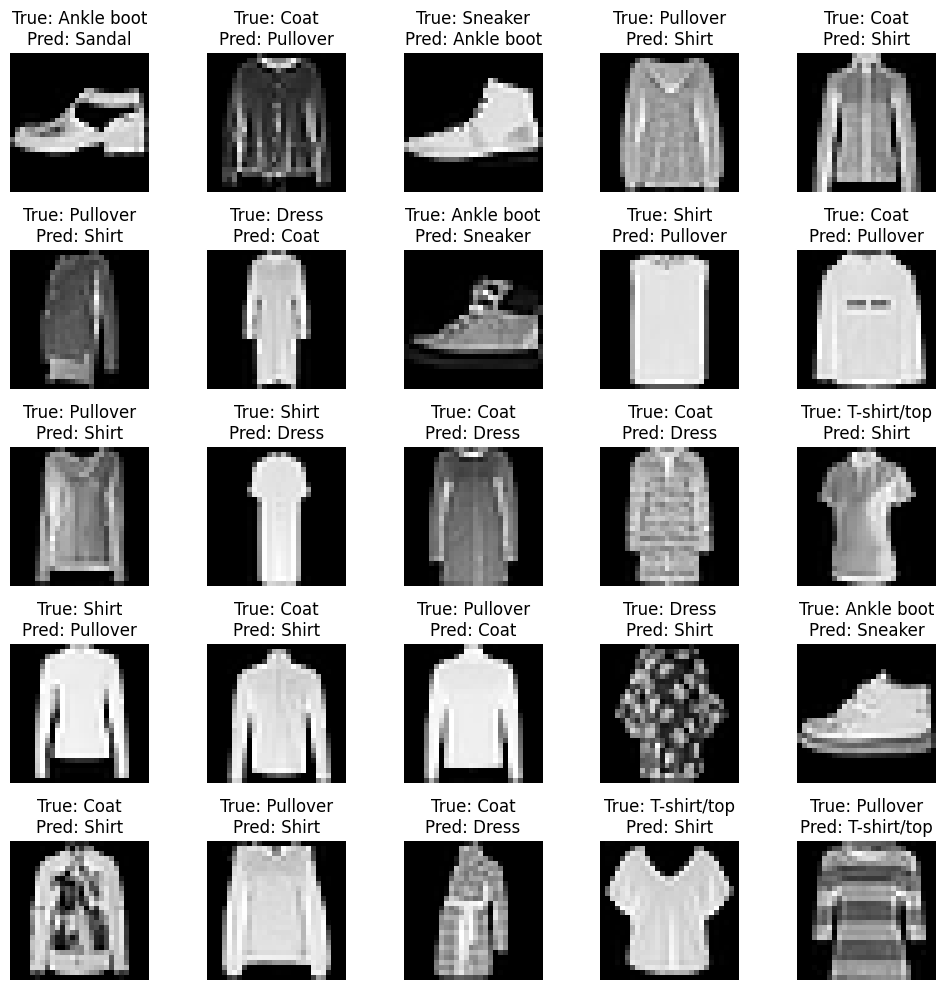

In [16]:
#OPTIONAL
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the test set
y_pred = model.predict(x_test)

# Convert predictions to class labels (argmax finds the index with highest probability)
y_pred_labels = np.argmax(y_pred, axis=1)

# Identify misclassified samples
misclassified_indices = np.where(y_pred_labels != y_test)[0]

# Plot the misclassified images
plt.figure(figsize=(10, 10))
for i, index in enumerate(misclassified_indices[:25]):  # Show up to the first 25 misclassified images
    plt.subplot(5, 5, i+1)
    plt.imshow(x_test[index].reshape(28, 28), cmap='gray')
    plt.title(f"True: {class_names[y_test[index]]}\nPred: {class_names[y_pred_labels[index]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
